Import Lib

In [228]:
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np
import math
from decimal import *
from sklearn.metrics import *
from sklearn.naive_bayes import BernoulliNB
import sklearn

Read Data

In [229]:
path = '/Users/liwang/desktop/ml/machine-learning-project/'
bot_acct = pd.read_csv(path + 'BotAccounts.csv')
good_acct = pd.read_csv(path + 'GoodAccounts.csv')
data = bot_acct.append(good_acct)
data.head(2)

,id,id_str,Screen_name,Location,Description,Url,Followers_count,Friends_count,Listed_count,Created_at,Favourites_count,Verified,Statuses_count,Lang,Status,Default_profile,Default_profile_image,Has_extended_profile,name,Bot
0,2.237810e+08,2.237810e+08,arcibald1976,NaN,NaN,NaN,7,182,0,2010-12-07 09:27:38,1,False,42,en,"{'in_reply_to_status_id_str': None, 'retweet_c...",True,False,False,daniel spanu,1
1,3.236639e+09,3.236639e+09,shayleaanderson,NaN,NaN,NaN,13,1479,0,2015-05-05 19:20:01,0,False,4,en,"{'in_reply_to_status_id_str': None, 'retweet_c...",True,True,False,Shay Corless,1


Only keep these columns in data: 'Followers_count', 'Friends_count', 'Listed_count','Favourites_count','Statuses_count, 'Bot'

In [230]:
data = data.drop(data.columns[[0,1,2,3,4,5,9,11,13,14,15,16,17,18]], axis=1)

Get summerized data information

In [231]:
print data.describe()

       Followers_count  Friends_count  Listed_count  Favourites_count  \
count     1.000000e+02     100.000000     100.00000         100.00000   
mean      1.060549e+05     616.970000     408.70000        3168.19000   
std       9.949956e+05     680.210744    3452.94585       10870.60446   
min       0.000000e+00       0.000000       0.00000           0.00000   
25%       5.750000e+00     153.250000       0.00000           0.00000   
50%       2.650000e+01     400.500000       0.00000          12.00000   
75%       3.280000e+02     751.500000       2.00000         607.50000   
max       9.949474e+06    3922.000000   34384.00000       92644.00000   

       Statuses_count         Bot  
count      100.000000  100.000000  
mean      3310.100000    0.500000  
std       9224.597759    0.502519  
min          1.000000    0.000000  
25%          7.000000    0.000000  
50%         38.000000    0.500000  
75%       1022.250000    1.000000  
max      65098.000000    1.000000  


Get Standard Deviation of each column

In [232]:
print data.std()

Followers_count     994995.567786
Friends_count          680.210744
Listed_count          3452.945850
Favourites_count     10870.604460
Statuses_count        9224.597759
Bot                      0.502519
dtype: float64


Plot all of the columns

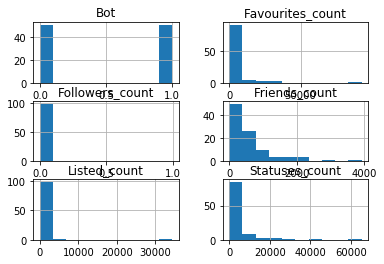

In [233]:
data.hist()
pl.show()

Manually add the intercept for logit regression

In [234]:
data['intercept'] = 1.0

We use all variables other than 'Bot' as explanatory variable, and 'Bot' as response variable

In [235]:
exp_cols = ['Followers_count', 'Friends_count', 'Listed_count','Favourites_count','Statuses_count', 'intercept']

Perform Logistic Regression

In [236]:
logit = sm.Logit(data['Bot'], data[exp_cols])
result = logit.fit()
print result.summary()

Optimization terminated successfully.
         Current function value: 0.372181
         Iterations 19
                           Logit Regression Results                           
Dep. Variable:                    Bot   No. Observations:                  100
Model:                          Logit   Df Residuals:                       94
Method:                           MLE   Df Model:                            5
Date:                Sat, 08 Apr 2017   Pseudo R-squ.:                  0.4631
Time:                        18:51:46   Log-Likelihood:                -37.218
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 1.647e-12
                       coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Followers_count     -0.0202      0.008     -2.691      0.007        -0.035    -0.006
Friends_co

Check Confidence Intervals of each coefficient

In [237]:
print result.conf_int()

                         0         1
Followers_count  -0.034989 -0.005500
Friends_count     0.000182  0.002381
Listed_count     -0.904230  0.939451
Favourites_count -0.000881  0.000799
Statuses_count   -0.000553  0.000494
intercept         0.156424  1.644849


In the result above, Listed_count, Favourites_count, and Statuses_count show statistical significance on the 95% level. Also, by looking at the confidence intervals of each coefficient, it is safe to say that, we are 95% confident that, Followers_count has a negative relationship toward the chance of an account being a bot. Although Friends_count has a positive relationship with the chance of an account being a bot, its confidence interval is too close to zero and may not show a strong link between this variable and the chance of an account being a bot. 
In simple words, an account with more followers actually has lower chance of being a bot. 

Consider Odd Ratio. This indicates how a 1 unit increase or decrease in a variable affects the odds of an account being a bot.

In [238]:
print np.exp(result.params)

Followers_count     0.979959
Friends_count       1.001283
Listed_count        1.017767
Favourites_count    0.999959
Statuses_count      0.999970
intercept           2.461169
dtype: float64


So far, our predicted coefficients are as following:
Followers_count     -0.0202
Friends_count        0.0013
Listed_count         0.0176
Favourites_count -4.097e-05
Statuses_count   -2.958e-05
intercept            0.9006

By using these coefficients, we predict the probability of an account being a bot. If probability is greater than 0.5, we predict it will be a bot (value 1). Otherwise it will be non-bot (value 0).
Testing data is provided. 

In [239]:
# Load test data; only keep five relavent columns and 'bot' column.
test_bot = pd.read_csv(path + 'data/bots_data.csv')
test_good = pd.read_csv(path + 'data/nonbots_data.csv')
test_data = test_bot.append(test_good)
test_data = test_data.drop(test_data.columns[[0,1,2,3,4,5,9,11,13,14,15,16,17,18]], axis=1)
test_data.head(2)

,followers_count,friends_count,listedcount,favourites_count,statuses_count,bot
0,1129,7,2,0,23557,1
1,0,22,0,0,1,1


In [240]:
# Logistic Regression
def regression(row):
    def linear(row):
        return -1 * (-0.0202 * row['followers_count'] + 0.0013 * row['friends_count'] + 0.0176 * row['listedcount'] - 4.097 * 10**(-5) * row['favourites_count'] - 2.958 * 10**(-5) * row['statuses_count'] + 0.9006)
    
    if linear(row) >= 0: 
              return 1
    else: 
              return 0

In [241]:
# Accuracy Score
predict = []
for index, row in test_data.iterrows():
    predict.append(regression(row))
actual = test_data['bot']
accuracyScore = accuracy_score(actual, predict)
print("Accuracy Score is: " + str(accuracyScore))

Accuracy Score is: 0.367831541219


In [242]:
# Precision Score
precision = precision_score(actual, predict)
print("Precision is: " + str(precision))

Precision is: 0.390364422483


In [243]:
# Recall Score 
recall = recall_score(actual, predict)
print("Recall is: " + str(recall))

Recall is: 0.598484848485


In [244]:
# F1 Score
F1 = 2 * (precision * recall) / (precision + recall)
print("F1: " + str(F1))

F1: 0.472523364486


In [245]:
# AUC
sklearn.metrics.auc(predict, actual, reorder=True)

0.5